In [10]:
model_path = '/home/ec2-user/autoencoding_beyond_pixels/out/1.celeba_reconganweight1.0e-06_recondepth9_nodisaerecon/arch.pickle'

In [88]:
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import deeppy as dp

In [ ]:
import model.aegan
with open(model_path, 'rb') as f:
    model = pickle.load(f)

In [89]:
# size of latent z vector in model
n_hidden = model.latent_encoder.n_out

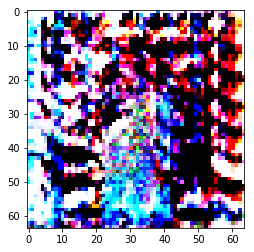

In [212]:
# draw a normal sample from z
num_samples = 1
samples_z = np.random.normal(size=(num_samples, n_hidden))
imgs = model.decode(samples_z.astype(dp.float_))
for i in range(num_samples):
    img = imgs[i]
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()

In [179]:
from skimage.transform import resize
from skimage.util import crop

In [201]:
timg = sp.misc.imread('/home/ec2-user/autoencoding_beyond_pixels/datasets/celeba/img_align_celeba/004584.jpg')

# resize image so shorter dim is same as what model expects
dims = np.array(timg[:,:,0].shape)
scale = model_img_size / min(dims)
new_dims = (scale * dims).astype('int_')
img_resized = resize(timg, new_dims)

# now figure out which is longer dim and crop it to what model expects
long_dim = np.argmax(new_dims)
long_dim_len = max(new_dims)
long_crop = int((long_dim_len - model_img_size)/2)
# assume the crop is the first dim
crops = [[long_crop, long_crop], [0, 0]]
# swap if it's not
if (long_dim == 1): crops = list(reversed(crops))
# add a crop of 0 for third dim (which is really the channels dim)
# crop fn wants list of lists, with inner list amount to cut at 
# each edge of the dim
crops = crops + [[0, 0]]
img_cropped = crop(img_resized, crops)

In [214]:
# model wants channels dim first
img_for_model = np.transpose(img_cropped, (2, 0, 1))
print(img_for_model.shape)
z = model.encode(img_for_model)
z

(3, 64, 64)


Exception: 
Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/deeppy/expr/graph/exprgraph.py", line 98, in _setup_nodes
    node.setup()
  File "build/bdist.linux-x86_64/egg/deeppy/expr/nnet/spatial.py", line 47, in setup
    self.weights.setup((self.n_filters, n_channels) + self.filter_shape)
  File "build/bdist.linux-x86_64/egg/deeppy/parameter.py", line 39, in setup
    (shape, self._array.shape))
ValueError: Shape (64, 64, 5, 5) does not match existing shape (64, 3, 5, 5)


Exception occurs in node Convolution with inputs:
    Source, shape: (3, 64, 64)